In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train_data.csv",na_values="na")

In [3]:
train.head()

,Unnamed: 0,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,52803,neg,41386,NaN,508.0,488.0,0.0,0.0,0.0,0.0,...,438088.0,202172.0,383094.0,392838.0,228526.0,104226.0,122526.0,6924.0,0.0,0.0
1,38189,neg,29616,NaN,1616.0,1490.0,0.0,0.0,0.0,0.0,...,145524.0,72858.0,171332.0,308328.0,379466.0,213826.0,5764.0,292.0,0.0,0.0
2,23291,neg,241352,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,3617298.0,2477772.0,3631902.0,997462.0,436380.0,202002.0,173850.0,1376.0,NaN,NaN
3,16862,neg,8100,NaN,86.0,76.0,0.0,0.0,0.0,0.0,...,66980.0,36658.0,91898.0,86634.0,60276.0,23616.0,7518.0,2.0,0.0,0.0
4,14055,neg,2290,NaN,636.0,448.0,0.0,0.0,0.0,0.0,...,11542.0,7394.0,14206.0,69592.0,3108.0,108.0,6.0,0.0,0.0,0.0


In [4]:
len(train.columns) # column 수 확인

172

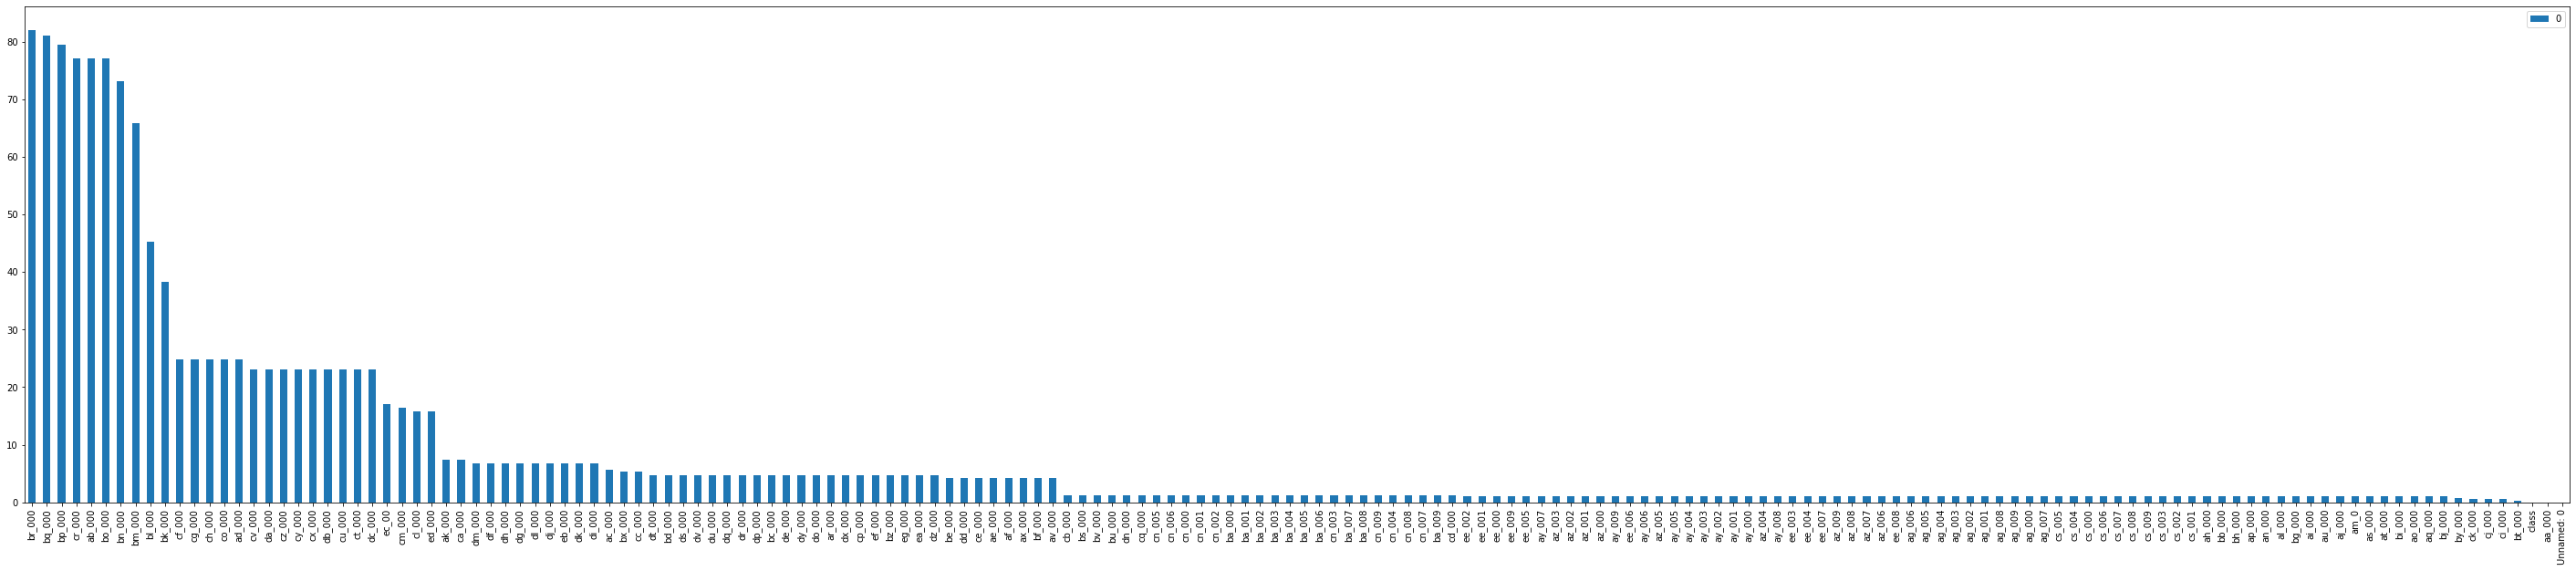

In [5]:
nan = train.isna().sum().div(train.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False) # 결측치 비율 확인
nan.plot.bar(figsize=(50,10))
plt.show()

In [6]:
cols_missing_70 = nan[nan[0]>70] # 70% 이상이 결측치로 구성된 열 이름 확인 (30, 50으로도 가능)
cols_missing_70

,0
br_000,82.059649
bq_000,81.121053
bp_000,79.456140
cr_000,77.171930
ab_000,77.171930
bo_000,77.161404
bn_000,73.222807


In [8]:
cols_to_drop = list(cols_missing_70.index)
cols_to_drop

['br_000', 'bq_000', 'bp_000', 'cr_000', 'ab_000', 'bo_000', 'bn_000']

In [9]:
train_nan = train.drop(cols_to_drop, axis=1) # 필요 없는 열 제거해주기

In [10]:
len(train_nan.columns) # 열 사라진 것 확인

165

In [11]:
train_nan.fillna(train_nan.mean(), inplace=True) # 결측값 채워넣기 mean 대신 median 사용 가능 

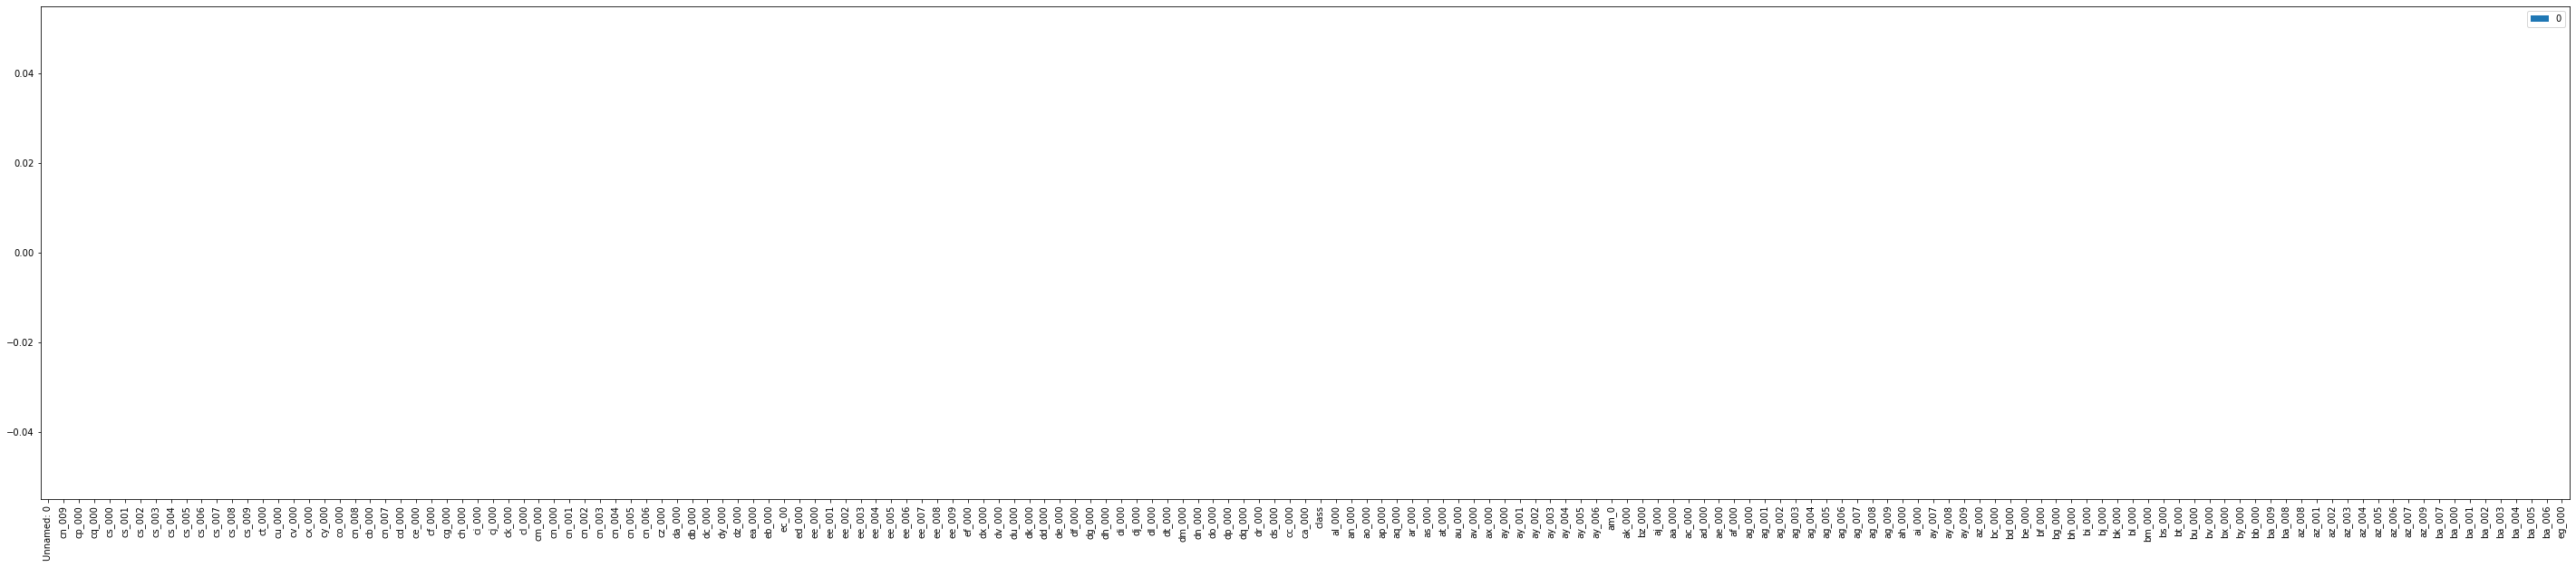

In [12]:
nan_after = train_nan.isna().sum().div(train_nan.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False) 
nan_after.plot.bar(figsize=(50,10))
plt.show() # 사라진 결측치 확인

In [13]:
print(train_nan.columns[2:])

Index(['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=163)


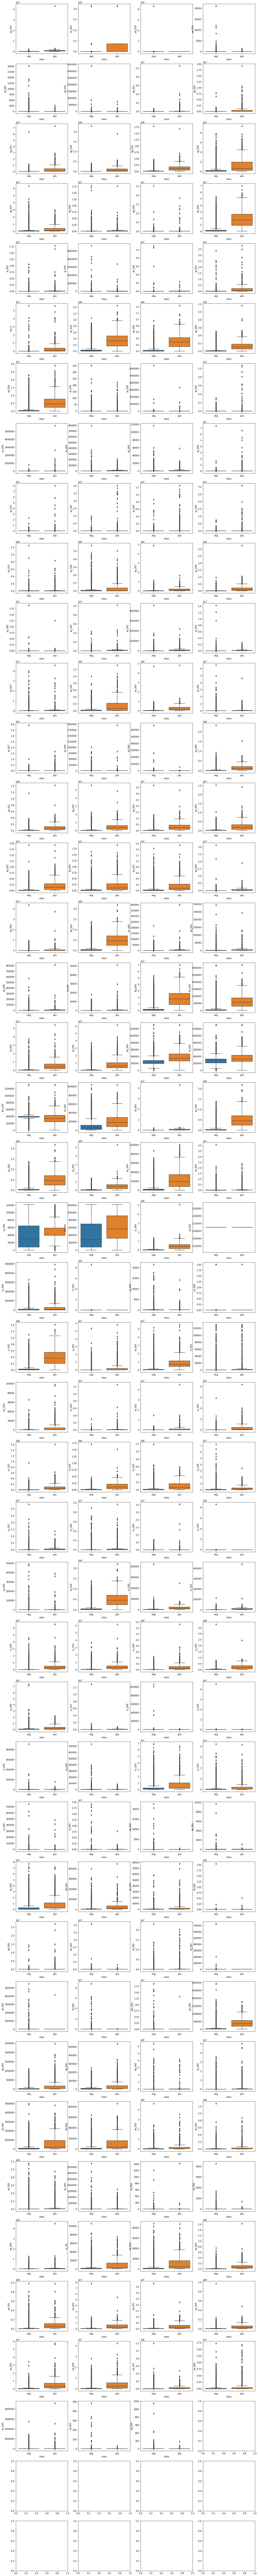

In [113]:
import seaborn as sns

fig, axs = plt.subplots(43,4, figsize = (20, 220))
fig_counter = 0

for i in train_nan.columns[2:]:
    row = fig_counter//4
    col = fig_counter%4
    sns.boxplot(x="class", y=i, data=train_nan, ax=axs[row,col])
    
    fig_counter += 1

plt.show()

In [14]:
X = train_nan.drop("class", axis=1) # Target Column 분리
y = train_nan.loc[:,"class"]
y = pd.get_dummies(y).drop("neg",axis=1)

In [15]:
# 정규화 또는 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [16]:
X_scaled = pd.DataFrame(X_scaled) # 데이터프레임으로 다시 바꿔주기

In [17]:
X_scaled.columns=X.columns # 열 이름 재설정
X_scaled = X_scaled.drop('Unnamed: 0',axis=1) # index 열 제거
X_scaled.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.085425,-4.616664e-01,-5.574406e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,-0.159182,...,-0.014786,-0.024279,-0.059890,-0.011532,-0.102795,-0.142095,-0.037541,-0.031036,-0.020466,-0.024171
1,-0.135892,-4.616650e-01,-5.546538e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,-0.178951,...,-0.257362,-0.253834,-0.232710,-0.084269,0.035943,-0.079054,-0.286087,-0.173844,-0.020466,-0.024171
2,0.771980,-7.715679e-17,1.618892e-18,0.000000,0.000000,-0.011554,-0.024041,-0.056992,-0.101566,0.068965,...,2.621227,4.015303,2.591474,0.508869,0.088256,-0.085855,0.071710,-0.150502,0.000000,0.000000
3,-0.228147,-4.616669e-01,-5.585865e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,-0.179083,...,-0.322486,-0.318095,-0.297536,-0.275081,-0.257443,-0.188461,-0.282353,-0.180089,-0.020466,-0.024171
4,-0.253059,-4.616662e-01,-5.575519e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,-0.178989,...,-0.368452,-0.370044,-0.360941,-0.289750,-0.309990,-0.201983,-0.298344,-0.180132,-0.020466,-0.024171


In [48]:
'''train_scaled = pd.concat([pd.DataFrame(X_scaled),y],axis=1)
train_scaled.head()'''

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,pos
0,0.671459,-0.085425,-4.616664e-01,-5.574406e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,...,-0.024279,-0.059890,-0.011532,-0.102795,-0.142095,-0.037541,-0.031036,-0.020466,-0.024171,0
1,0.004783,-0.135892,-4.616650e-01,-5.546538e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,...,-0.253834,-0.232710,-0.084269,0.035943,-0.079054,-0.286087,-0.173844,-0.020466,-0.024171,0
2,-0.674848,0.771980,-7.715679e-17,1.618892e-18,0.000000,0.000000,-0.011554,-0.024041,-0.056992,-0.101566,...,4.015303,2.591474,0.508869,0.088256,-0.085855,0.071710,-0.150502,0.000000,0.000000,0
3,-0.968133,-0.228147,-4.616669e-01,-5.585865e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,...,-0.318095,-0.297536,-0.275081,-0.257443,-0.188461,-0.282353,-0.180089,-0.020466,-0.024171,0
4,-1.096185,-0.253059,-4.616662e-01,-5.575519e-03,-0.042728,-0.054875,-0.011554,-0.024041,-0.056992,-0.113126,...,-0.370044,-0.360941,-0.289750,-0.309990,-0.201983,-0.298344,-0.180132,-0.020466,-0.024171,0


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0) # SMOTE 방식 사용
X_over,y_over = smote.fit_sample(X_scaled,y)

In [20]:
print(y['pos'].value_counts()) # data 달라진 거 확인
print(y_over['pos'].value_counts())

0    55934
1     1066
Name: pos, dtype: int64
1    55934
0    55934
Name: pos, dtype: int64


In [21]:
print(len(X_over))
print(len(y_over))

111868
111868


In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA() # PCA 몇 개의 성분으로 할지 우선 전체 진행
pca.fit(X_over)
PC_score = pca.transform(X_over)

In [24]:
ratio = pca.explained_variance_ratio_ # 성분 별 설명력 확인 변수

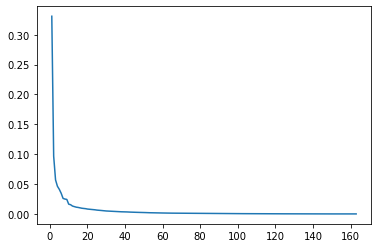

In [25]:
plt.plot(range(1,164),ratio) # 가장 효율적인 pca 성분의 수는 20개 정도(이 때 가장 꺾임;이후에는 설명력 정도가 높지 않음)

In [26]:
cusum_ratio = [0]
for i in ratio:
    cusum = cusum_ratio[-1]+i
    cusum_ratio.append(cusum)

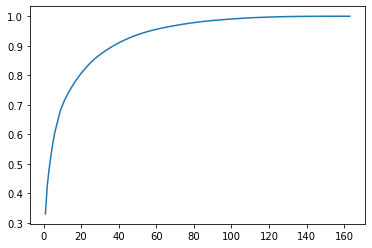

In [27]:
cusum_ratio=cusum_ratio[1:]
plt.plot(range(1,164),cusum_ratio) # 40개 정도 성분이면 90%의 설명력을 가진다.

In [28]:
pca = PCA(n_components=40) # 40개로 다시 PCA 진행
pca.fit(X_over)

PCA(n_components=40)

In [29]:
print('explained variance ratio :', sum(pca.explained_variance_ratio_)) # 40개로 진행시 90.96% 설명력 가짐

explained variance ratio : 0.9096449155356937


In [30]:
pca_component = pca.fit_transform(X_over) # PCA를 가지고 데이터 표현
train_pca = pd.DataFrame(data=pca_component)
train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-13.474137,-0.201309,0.112738,2.100149,-0.108343,0.332246,-0.051066,0.004678,-0.421632,-0.051981,...,0.208476,0.092016,-0.006447,0.163308,-0.021266,-0.033246,-0.027223,0.020548,-0.110345,0.065997
1,-14.277295,0.137395,0.294555,2.071326,-0.253018,0.312414,0.023873,-0.133224,-0.244085,-0.015593,...,-0.057697,0.240063,0.280232,0.163791,-0.154768,-0.008348,-0.169295,-0.025775,0.050053,0.118297
2,-4.524738,-3.559035,-0.944664,3.189952,-2.031561,-0.052526,0.822554,-0.452110,0.264181,0.040958,...,0.238476,-0.199008,-0.669434,0.224625,-0.116846,0.017210,0.599435,-0.624838,1.058084,0.115356
3,-15.197917,0.365988,0.575213,2.322876,-0.567241,0.421194,0.038690,-0.020610,-0.412908,0.166253,...,-0.183812,0.075169,0.029201,0.116068,-0.009589,-0.060019,-0.078737,-0.053003,0.065688,-0.058094
4,-15.545182,0.462157,0.670685,2.437742,-0.610933,0.450371,0.076577,-0.002982,-0.456387,0.160029,...,-0.092095,0.012496,-0.030305,0.124790,-0.007971,-0.197795,-0.165089,0.043734,0.279961,-0.138809


In [31]:
names = list(range(1,41)) # 이름 재설정
k = 0
for i in names:
    names[k] = "component" + str(i)
    k += 1

In [32]:
train_pca.columns = names
train_pca.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,...,component31,component32,component33,component34,component35,component36,component37,component38,component39,component40
0,-13.474137,-0.201309,0.112738,2.100149,-0.108343,0.332246,-0.051066,0.004678,-0.421632,-0.051981,...,0.208476,0.092016,-0.006447,0.163308,-0.021266,-0.033246,-0.027223,0.020548,-0.110345,0.065997
1,-14.277295,0.137395,0.294555,2.071326,-0.253018,0.312414,0.023873,-0.133224,-0.244085,-0.015593,...,-0.057697,0.240063,0.280232,0.163791,-0.154768,-0.008348,-0.169295,-0.025775,0.050053,0.118297
2,-4.524738,-3.559035,-0.944664,3.189952,-2.031561,-0.052526,0.822554,-0.452110,0.264181,0.040958,...,0.238476,-0.199008,-0.669434,0.224625,-0.116846,0.017210,0.599435,-0.624838,1.058084,0.115356
3,-15.197917,0.365988,0.575213,2.322876,-0.567241,0.421194,0.038690,-0.020610,-0.412908,0.166253,...,-0.183812,0.075169,0.029201,0.116068,-0.009589,-0.060019,-0.078737,-0.053003,0.065688,-0.058094
4,-15.545182,0.462157,0.670685,2.437742,-0.610933,0.450371,0.076577,-0.002982,-0.456387,0.160029,...,-0.092095,0.012496,-0.030305,0.124790,-0.007971,-0.197795,-0.165089,0.043734,0.279961,-0.138809


In [69]:
train_pca.to_csv('train_pca.csv',index=False, header=True) # 저장

In [34]:
y_over.columns=['class']
len(y_over)

111868

In [40]:
y_over.to_csv('train_y.csv',index=False, header=True)

In [35]:
import tensorflow as tf 
import keras
from keras import layers
from keras import optimizers
from keras.optimizers import Adam

print("TensorFlow version: {}".format(tf.__version__))

Using TensorFlow backend.


TensorFlow version: 2.0.0


In [42]:
pca_36 = PCA(n_components=36) # 36개로 다시 PCA 진행 (CNN 모델을 위해)
pca_36.fit(X_over)

PCA(n_components=36)

In [43]:
print('explained variance ratio :', sum(pca_36.explained_variance_ratio_)) # 36개로 진행시 90.96% 설명력 가짐

explained variance ratio : 0.8953117106996347


In [44]:
pca_component36 = pca_36.fit_transform(X_over) # PCA를 가지고 데이터 표현
train_pca36 = pd.DataFrame(data=pca_component36)
train_pca36.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-13.474137,-0.201309,0.112737,2.100149,-0.108343,0.332238,-0.051059,0.004651,-0.421647,-0.052047,...,-0.143032,-0.050350,0.055282,0.312648,0.197311,0.067749,-0.026105,-0.134146,-0.022462,-0.092645
1,-14.277295,0.137395,0.294556,2.071325,-0.253019,0.312393,0.023894,-0.133258,-0.244097,-0.015519,...,-0.187664,0.234184,0.321685,0.240140,-0.026867,0.207183,0.230256,-0.060159,-0.121593,-0.082203
2,-4.524738,-3.559035,-0.944667,3.189954,-2.031554,-0.052488,0.822536,-0.452128,0.264234,0.040166,...,-0.601062,-0.088534,-0.412435,0.375383,0.023725,-0.172848,-0.558938,-0.248925,-0.068335,0.223551
3,-15.197917,0.365989,0.575213,2.322876,-0.567241,0.421183,0.038702,-0.020633,-0.412908,0.166257,...,-0.073680,0.003445,0.008182,0.043219,-0.196415,0.045035,0.040025,-0.076424,0.001642,-0.071181
4,-15.545182,0.462157,0.670683,2.437742,-0.610930,0.450391,0.076549,-0.002976,-0.456346,0.159927,...,-0.032130,-0.012243,-0.152267,0.035329,-0.205052,0.036560,0.121655,-0.157368,-0.002466,-0.000876


In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_pca36, y_over, test_size=0.2, shuffle=True, random_state=1005)

In [54]:
# 형석 코드
total_samples = x_train.shape[0]
desired_shape = (total_samples,6,6,1)
x_train = x_train.values
x_train = x_train.reshape(desired_shape)

x_train[0]

array([[[-13.65831882],
        [  0.27579651],
        [  0.42159987],
        [  2.18344191],
        [ -0.0941787 ],
        [  0.26790114]],

       [[ -0.26497153],
        [ -0.33968936],
        [ -0.45901976],
        [ -0.32917673],
        [ -0.41857932],
        [  0.41175696]],

       [[ -0.29846995],
        [  0.20092811],
        [  0.16968195],
        [ -0.14497032],
        [ -0.31325877],
        [ -0.04371651]],

       [[ -0.18726077],
        [ -0.22378415],
        [ -0.26027213],
        [  0.26904518],
        [  0.20233673],
        [  0.34400153]],

       [[  0.10658114],
        [  0.3242506 ],
        [ -0.12858764],
        [  0.14311154],
        [ -0.18964602],
        [ -0.11823541]],

       [[ -0.12761721],
        [ -0.08041252],
        [  0.0258298 ],
        [  0.2050499 ],
        [ -0.19565862],
        [ -0.08787188]]])

In [55]:
total_samples1 = x_test.shape[0]
desired_shape1 = (total_samples1,6,6,1)
x_test = x_test.values
x_test = x_test.reshape(desired_shape1)

x_test[0]

array([[[-0.15841635],
        [ 1.98391905],
        [ 0.17729444],
        [-2.40611727],
        [ 6.65204327],
        [-2.46798433]],

       [[ 1.66290713],
        [-1.2673599 ],
        [ 7.90269874],
        [ 0.36768279],
        [-6.77068988],
        [ 2.03558389]],

       [[-4.7138153 ],
        [ 2.09371094],
        [ 1.63481916],
        [-1.84098302],
        [-1.69222667],
        [ 2.5448039 ]],

       [[-0.53224806],
        [ 0.3400639 ],
        [-2.16282568],
        [ 1.27238564],
        [ 2.164316  ],
        [-0.52496562]],

       [[ 0.85526998],
        [ 0.25405941],
        [ 0.36177542],
        [ 0.36228094],
        [ 2.85094475],
        [-1.98999212]],

       [[-0.23246149],
        [-1.64210938],
        [-0.41749471],
        [-0.09311276],
        [-0.90700263],
        [ 0.08075238]]])

In [56]:
# CNN 설정
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(6,6,1)),
  tf.keras.layers.ZeroPadding2D(),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(6, 6, 1)),
  tf.keras.layers.ZeroPadding2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(6, 6, 32)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          320       
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                36880     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [61]:
type(np.array(y_train))

numpy.ndarray

In [62]:
#fit CNN
num_epochs = 20
batch_size = 128
history = model.fit(x_train, np.array(y_train), 
          epochs = num_epochs, batch_size = batch_size, 
          verbose = 1, shuffle = True, 
          validation_split=0.1
          )

Train on 80544 samples, validate on 8950 samples
Epoch 1/20
80544/80544 [==============================] - 30s 372us/sample - loss: 0.1304 - accuracy: 0.9597 - val_loss: 0.1049 - val_accuracy: 0.9714
Epoch 2/20
80544/80544 [==============================] - 19s 234us/sample - loss: 0.0845 - accuracy: 0.9749 - val_loss: 0.0779 - val_accuracy: 0.9777
Epoch 3/20
80544/80544 [==============================] - 20s 247us/sample - loss: 0.0662 - accuracy: 0.9808 - val_loss: 0.0678 - val_accuracy: 0.9835
Epoch 4/20
80544/80544 [==============================] - 21s 266us/sample - loss: 0.0514 - accuracy: 0.9853 - val_loss: 0.0564 - val_accuracy: 0.9861
Epoch 5/20
80544/80544 [==============================] - 26s 317us/sample - loss: 0.0411 - accuracy: 0.9883 - val_loss: 0.0472 - val_accuracy: 0.9884
Epoch 6/20
80544/80544 [==============================] - 24s 293us/sample - loss: 0.0362 - accuracy: 0.9900 - val_loss: 0.0432 - val_accuracy: 0.9893
Epoch 7/20
80544/80544 [=====================

In [42]:
def calculate_cost(test_data):
    falsepos = test_data.loc[(test_data['class'] == 0) & (test_data['prediction'] == True)].shape[0]
    print('false pos:', falsepos)
    falseneg = test_data.loc[(test_data['class'] == 1) & (test_data['prediction'] == False)].shape[0]
    print('false neg:', falseneg)
    cost = falsepos * 10 + falseneg * 500
    return cost

In [65]:
print(model.evaluate(x_test, np.array(y_test)))
# make predictions on test set
test_pred = model.predict(x_test)

22374/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.030228765656891334, 0.9933405]


In [84]:
test_pred[1:10]

array([[0.9999675 ],
       [0.        ],
       [0.        ],
       [0.99996924],
       [0.9999975 ],
       [1.        ],
       [0.9997494 ],
       [0.        ],
       [1.        ]], dtype=float32)

In [94]:
# sweep thtrough a range of decision threshold to minimize the cost
decision_threshold = np.logspace(-3, -1, 5)
cost_list = []
for dt in decision_threshold:
    pred_label = test_pred > dt
    pred_label_df = y_test[['class']]
    pred_label_df['prediction'] = pred_label
    cost_list.append(calculate_cost(pred_label_df))
    
print('min cost:', min(cost_list))
print('decision threshold for min cost:', decision_threshold[np.argmin(cost_list)])

false pos: 1509
false neg: 0
false pos: 947
false neg: 0
false pos: 522
false neg: 1
false pos: 316
false neg: 2
false pos: 211
false neg: 7
min cost: 4160
decision threshold for min cost: 0.03162277660168379


In [90]:
pred_label_df['prediction'] = np.where(pred_label_df['prediction']==True, 1,0)

In [143]:
pred_label_df.head()
len(pred_label_df)

22374

In [95]:
from sklearn.metrics import confusion_matrix

pred_label_df['prediction'] = np.where(pred_label_df['prediction']==True, 1,0)
results = confusion_matrix(y_true=y_test[['class']], y_pred=pred_label_df[['prediction']])
print(results)

[[10928   211]
 [    7 11228]]


In [72]:
y_test.columns=['class']

Text(0.5, 1.0, 'Cost as a func of decision threshold in CNN')

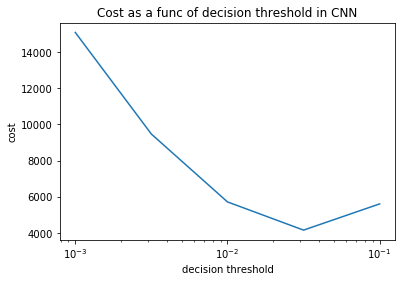

In [96]:
plt.figure()
plt.semilogx(decision_threshold, cost_list)
plt.xlabel('decision threshold')
plt.ylabel('cost')
plt.title('Cost as a func of decision threshold in CNN')

In [99]:
y_over.columns=['class']

In [100]:
# 기태 코드
# label에 따라 분류를 해야하므로 다시 합침
training_data = pd.concat([train_pca,y_over], axis=1)

In [101]:
training_data.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,...,component32,component33,component34,component35,component36,component37,component38,component39,component40,class
0,-13.474137,-0.201309,0.112739,2.100148,-0.108342,0.332244,-0.051070,0.004670,-0.421634,-0.052050,...,0.094047,-0.021555,-0.144910,-0.011901,-0.057979,-0.060250,-0.100016,-0.058259,0.133284,0
1,-14.277295,0.137395,0.294556,2.071321,-0.253016,0.312402,0.023888,-0.133237,-0.244077,-0.015522,...,0.237054,0.244527,-0.090849,-0.126032,-0.094906,-0.210261,0.008419,0.016719,0.172003,0
2,-4.524738,-3.559035,-0.944664,3.189963,-2.031568,-0.052488,0.822466,-0.452161,0.264186,0.040034,...,-0.122777,-0.575204,-0.366400,-0.153846,0.195242,0.512754,1.379556,0.365549,0.125951,0
3,-15.197917,0.365988,0.575213,2.322875,-0.567239,0.421190,0.038701,-0.020615,-0.412910,0.166291,...,0.069501,0.025243,-0.093739,0.006229,-0.098331,-0.074462,0.066452,-0.003397,-0.048890,0
4,-15.545182,0.462157,0.670685,2.437747,-0.610934,0.450385,0.076567,-0.002958,-0.456415,0.160137,...,0.027484,0.022162,-0.144959,0.008183,-0.169053,-0.110648,0.129225,0.267624,-0.205020,0


In [106]:
neg = training_data.loc[training_data['class'] == 0]
print(neg.shape)
pos = training_data.loc[training_data['class'] == 1]
print(pos.shape)

(55934, 41)
(55934, 41)


In [110]:
# train, test셋 나눠주기
train_neg, test_neg = train_test_split(neg, test_size=0.2, shuffle=True, random_state=1005)
train_pos, test_pos = train_test_split(pos, test_size=0.2, shuffle=True, random_state=1005)

In [109]:
train_neg.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,...,component32,component33,component34,component35,component36,component37,component38,component39,component40,class
37026,-10.679402,2.478147,1.177821,0.977322,0.404282,0.197235,-0.605559,-0.820073,1.010413,0.664215,...,0.678935,0.299179,0.746560,-0.998275,-0.144465,0.181861,0.253766,-1.039753,-0.023319,0
21918,-13.849949,-0.012648,0.144707,2.252224,-0.239278,0.245235,0.037501,-0.149600,-0.224789,-0.179406,...,0.092344,-0.163205,-0.276527,-0.041421,-0.081194,0.124886,-0.209435,0.064218,-0.099200,0
50173,-12.993723,0.267410,0.427350,1.855671,-0.169944,0.260146,-0.413648,-0.165015,-0.525357,-0.215591,...,-0.056395,-0.076330,0.088865,-0.037133,0.057093,0.143389,0.312822,-0.358402,0.152932,0
12179,-13.942841,-0.047809,0.189481,2.131667,-0.090516,0.246263,0.210076,-0.191511,-0.117744,-0.144154,...,0.087555,-0.035416,-0.280074,-0.189709,-0.125006,-0.032517,0.119015,0.058695,-0.053160,0
36404,-15.260249,0.331385,0.555100,2.356120,-0.549388,0.443440,0.032149,0.051532,-0.482930,0.169659,...,-0.003039,-0.043606,-0.064746,0.064146,-0.110446,-0.072271,0.028553,0.022842,-0.035759,0


In [111]:
# class 제거

x_train_neg = train_neg.drop('class', axis=1)
print(x_train_neg.shape)
x_train_pos = train_pos.drop('class', axis=1)

(44747, 40)


In [112]:
# define NN model, 40은 feature 개수 넣어준 거고, 간단한 3개 레이어 

model = keras.Sequential([
    layers.Dense(40, activation='relu', input_shape=(40,)),
    layers.Dense(5, activation = 'relu'),
    layers.Dense(40, activation = 'sigmoid')]
)

In [113]:
model.compile(optimizer = 'adam', loss = 'mae')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 205       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                240       
Total params: 2,085
Trainable params: 2,085
Non-trainable params: 0
_________________________________________________________________


In [114]:
# 'neg' class로 학습하기

num_epochs = 20
batch_size = 128
neg_model = model.fit(x_train_neg, x_train_neg, 
          epochs = num_epochs, batch_size = batch_size, verbose = 1, shuffle = True, 
          validation_split=0.1
          )

Train on 40272 samples, validate on 4475 samples
Epoch 1/20
40272/40272 [==============================] - 2s 39us/step - loss: 0.8131 - val_loss: 0.6627
Epoch 2/20
40272/40272 [==============================] - 1s 26us/step - loss: 0.6634 - val_loss: 0.6472
Epoch 3/20
40272/40272 [==============================] - 1s 27us/step - loss: 0.6542 - val_loss: 0.6410
Epoch 4/20
40272/40272 [==============================] - 1s 25us/step - loss: 0.6503 - val_loss: 0.6377
Epoch 5/20
40272/40272 [==============================] - 1s 24us/step - loss: 0.6470 - val_loss: 0.6348
Epoch 6/20
40272/40272 [==============================] - 1s 26us/step - loss: 0.6450 - val_loss: 0.6332
Epoch 7/20
40272/40272 [==============================] - 1s 25us/step - loss: 0.6435 - val_loss: 0.6320
Epoch 8/20
40272/40272 [==============================] - 1s 26us/step - loss: 0.6425 - val_loss: 0.6310
Epoch 9/20
40272/40272 [==============================] - 1s 29us/step - loss: 0.6415 - val_loss: 0.6300
Epoch 

dict_keys(['val_loss', 'loss'])
[0.8130750438974734, 0.6633987712348601, 0.6541667591734542, 0.6502942554193875, 0.6469781219509323, 0.6450381700984059, 0.6435280900461882, 0.6425360680384251, 0.641517699191056, 0.6406996389869475, 0.6401591204109768, 0.6392633366262719, 0.638111480228665, 0.6377765204776693, 0.6375167985070448, 0.6372902487117145, 0.6370823039012056, 0.636906246131121, 0.6367149594098176, 0.6365513585605553]


Text(0, 0.5, 'MAE Loss')

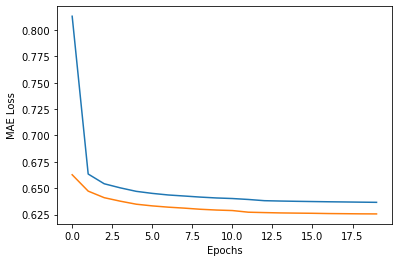

In [115]:
# 학습 진행 과정

print(neg_model.history.keys())
print(neg_model.history['loss'])
plt.plot(neg_model.history['loss'], label = 'training loss')
plt.plot(neg_model.history['val_loss'], label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')

In [117]:
# 예측

x_train_neg_pred = model.predict(x_train_neg)
x_train_neg_pred[:5]

array([[4.17232513e-07, 9.62571204e-01, 9.65811968e-01, 9.72307444e-01,
        6.88433647e-06, 5.36992848e-01, 4.17232513e-07, 1.19209290e-07,
        6.76955163e-01, 5.16535521e-01, 5.63353300e-04, 5.50333858e-02,
        0.00000000e+00, 7.07888603e-03, 5.78165054e-06, 1.20285153e-02,
        9.92918015e-03, 4.32773232e-02, 1.78498030e-03, 1.36971474e-04,
        6.79147840e-02, 1.01969540e-02, 2.76615471e-01, 1.56750083e-02,
        2.00986862e-04, 2.38091052e-02, 9.96134579e-02, 8.55136514e-02,
        8.26716423e-05, 2.98023224e-08, 3.22242856e-01, 9.30216908e-02,
        4.59987998e-01, 4.35161412e-01, 1.12127066e-02, 1.10596418e-04,
        3.78248423e-01, 6.74406290e-01, 4.88007963e-02, 9.73111391e-02],
       [1.48117542e-05, 7.00253248e-03, 1.03426874e-01, 9.99934673e-01,
        1.19283795e-03, 2.89218187e-01, 9.53674316e-07, 1.04069710e-04,
        9.51528549e-04, 2.06200480e-02, 1.35987997e-04, 6.26979768e-02,
        0.00000000e+00, 2.95558870e-02, 2.98023224e-08, 8.76486

In [118]:
x_train_neg_loss = np.mean(np.abs(x_train_neg - x_train_neg_pred), axis=1)
print(x_train_neg_loss)

37026    0.675874
21918    0.476917
50173    0.496369
12179    0.501148
36404    0.520437
           ...   
21240    2.325041
51721    0.476193
2353     0.499181
34703    0.587852
18487    0.519019
Length: 44747, dtype: float64


In [119]:
x_train_pos_pred = model.predict(x_train_pos) # 예측
x_train_pos_loss = np.mean(np.abs(x_train_pos - x_train_pos_pred), axis=1) # loss 구하기
print(x_train_pos_loss)

92303      3.455959
77461      1.197318
105195     2.824639
67914     13.794106
91688      4.500409
            ...    
76789      0.729358
106711     1.948663
58257      0.742758
90017      2.393386
74081      2.059165
Length: 44747, dtype: float64


In [120]:
x_train_neg_loss.describe()

count    44747.000000
mean         0.635355
std          0.571317
min          0.397157
25%          0.509088
50%          0.537707
75%          0.566922
max         31.069894
dtype: float64

In [121]:
x_train_pos_loss.describe()

count    44747.000000
mean         3.230023
std          2.374995
min          0.456917
25%          1.570453
50%          2.666047
75%          4.234370
max         36.203923
dtype: float64

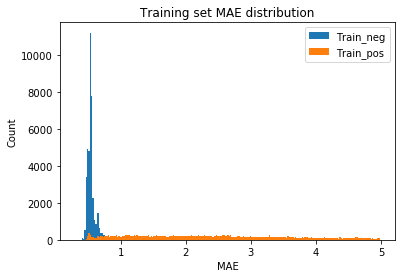

In [122]:
# trainset 기준선 확인
bins = np.arange(0.3, 5.0, 0.02)
plt.hist(x_train_neg_loss, bins = bins, label='Train_neg')
plt.hist(x_train_pos_loss, bins = bins, label='Train_pos')

plt.xlabel('MAE')
plt.ylabel('Count')
plt.title('Training set MAE distribution')
plt.legend()

In [123]:
def get_mae_loss(x, model):
    pred = model.predict(x)
    #maeloss = np.mean(np.abs(x - pred), axis = 1)
    return np.mean(np.abs(x - pred), axis = 1)

In [126]:
test_auto = pd.concat([test_neg,test_pos])
len(test_auto)

22374

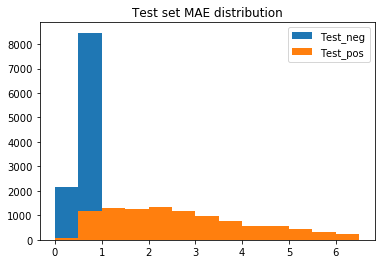

In [135]:
# 적절한 기준선을 찾기 위한 그래프 확인
x_test = test_auto.drop('class', axis=1)
x_test_neg = test_neg.drop('class', axis=1)
x_test_pos = test_pos.drop('class', axis=1)

x_test_loss = get_mae_loss(x_test, model)
x_test_neg_loss = get_mae_loss(x_test_neg, model)
x_test_pos_loss = get_mae_loss(x_test_pos, model)

bins = np.arange(0, 7, 0.5)
#plt.hist(x_test_loss, bins = bins, label='Train')
plt.hist(x_test_neg_loss, bins = bins, label='Test_neg')
plt.hist(x_test_pos_loss, bins = bins, label = 'Test_pos')
plt.title('Test set MAE distribution')
plt.legend()

In [132]:
x_test_loss.head()

31298    1.264367
16032    0.550893
22033    0.526567
29960    0.820718
37740    0.640237
dtype: float64

In [140]:
# 최적 threshold 찾기
threshold = np.arange(0, 2, 0.5)
cost_list_auto = []
for t in threshold:
    test_pred_auto = x_test_loss > t
    test_data = test_auto[['class']]
    test_data['prediction'] = test_pred_auto
    cost_list_auto.append(calculate_cost(test_data))
print(cost_list_auto)

false pos: 11187
false neg: 0
false pos: 9011
false neg: 63
false pos: 547
false neg: 1228
false pos: 284
false neg: 2540
[111870, 121610, 619470, 1272840]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [141]:
test_data['class'].value_counts()

1    11187
0    11187
Name: class, dtype: int64

In [36]:
# 정윤 코드
from sklearn.model_selection import train_test_split

# Train, test 나누기
x_train, x_test, y_train, y_test = train_test_split(train_pca, y_over, test_size=0.2, shuffle=True, random_state=1005)

In [37]:
#feature 개수 지정
num_features = len(x_train.columns)

In [38]:
# FFN 층 설정
model = keras.Sequential([
    layers.Dense(num_features, activation='relu', input_shape=(num_features,)),
    layers.Dense(5, activation = 'relu'),
    layers.Dense(5, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')]
)


# 모델 compile
threshold = 0.001
model.compile(optimizer =  tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold = threshold)], 
              )

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 205       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 하이퍼 파라미터 설정
optimizer_conf = optimizers.Adam(lr=0.01)
opt_conf = optimizers.serialize(optimizer_conf)

num_epochs = 50
batch_size = 256

In [41]:
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1) # 모델 학습

Train on 80544 samples, validate on 8950 samples
Epoch 1/50
80544/80544 [==============================] - 3s 38us/step - loss: 0.2446 - binary_accuracy: 0.4951 - val_loss: 0.1537 - val_binary_accuracy: 0.4992
Epoch 2/50
80544/80544 [==============================] - 2s 21us/step - loss: 0.1398 - binary_accuracy: 0.4992 - val_loss: 0.1367 - val_binary_accuracy: 0.4994
Epoch 3/50
80544/80544 [==============================] - 1s 17us/step - loss: 0.1241 - binary_accuracy: 0.4994 - val_loss: 0.1264 - val_binary_accuracy: 0.4995
Epoch 4/50
80544/80544 [==============================] - 1s 15us/step - loss: 0.1129 - binary_accuracy: 0.4995 - val_loss: 0.1161 - val_binary_accuracy: 0.4995
Epoch 5/50
80544/80544 [==============================] - 1s 13us/step - loss: 0.1033 - binary_accuracy: 0.4996 - val_loss: 0.1076 - val_binary_accuracy: 0.4997
Epoch 6/50
80544/80544 [==============================] - 1s 14us/step - loss: 0.0960 - binary_accuracy: 0.5000 - val_loss: 0.1020 - val_binary_ac

In [43]:
print(model.evaluate(x_test, y_test))
test_pred = model.predict(x_test) # testset에 대한 예측

22374/22374 [==============================] - 2s 92us/step
[0.05178182564899275, 0.657465934753418]


In [44]:
test_pred[1:10] # 예측 잘 되었는지 확인

array([[9.9999869e-01],
       [1.1026859e-06],
       [5.2124262e-05],
       [9.9073613e-01],
       [9.9660623e-01],
       [1.0000000e+00],
       [9.9587595e-01],
       [0.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [45]:
# 최적 Threshold 찾기
decision_threshold = np.logspace(-3, -1, 5) # 후보
cost_list = []
for dt in decision_threshold:
    pred_label = test_pred > dt
    pred_label_df = y_test[['class']]
    pred_label_df['prediction'] = pred_label
    cost_list.append(calculate_cost(pred_label_df))
    
print('min cost:', min(cost_list))
print('decision threshold for min cost:', decision_threshold[np.argmin(cost_list)])

false pos: 5934
false neg: 0
false pos: 3576
false neg: 0
false pos: 2071
false neg: 0
false pos: 1061
false neg: 3
false pos: 533
false neg: 22
min cost: 12110
decision threshold for min cost: 0.03162277660168379


In [46]:
from sklearn.metrics import confusion_matrix

pred_label_df['prediction'] = np.where(pred_label_df['prediction']==True, 1,0) 
results = confusion_matrix(y_true=y_test[['class']], y_pred=pred_label_df[['prediction']]) #confusion matrix 생성
print(results)

[[10606   533]
 [   22 11213]]
